In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from enum import IntEnum

sns.set()
import matplotlib.pyplot as plt

In [4]:
class AgeCategory(IntEnum):
    YOUNG = 1
    MID   = 2
    OLD   = 3


def define_age_category(age: int or float):
    if age < 30:
        return AgeCategory.YOUNG
    elif 30 <= age <= 55:
        return AgeCategory.MID
    else:
        return AgeCategory.OLD

**Reading data**

In [5]:
df = pd.read_csv('data/titanic_train.csv', index_col='PassengerId')
df = df.drop('Cabin', axis=1).dropna()
df.shape

(712, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Name      712 non-null    object 
 3   Sex       712 non-null    object 
 4   Age       712 non-null    float64
 5   SibSp     712 non-null    int64  
 6   Parch     712 non-null    int64  
 7   Ticket    712 non-null    object 
 8   Fare      712 non-null    float64
 9   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB


**1. Build a picture to visualize all scatter plots for each pair of features Age, Fare, SibSp, Parch and Survived. ( scatter_matrix from Pandas or pairplot from Seaborn)**

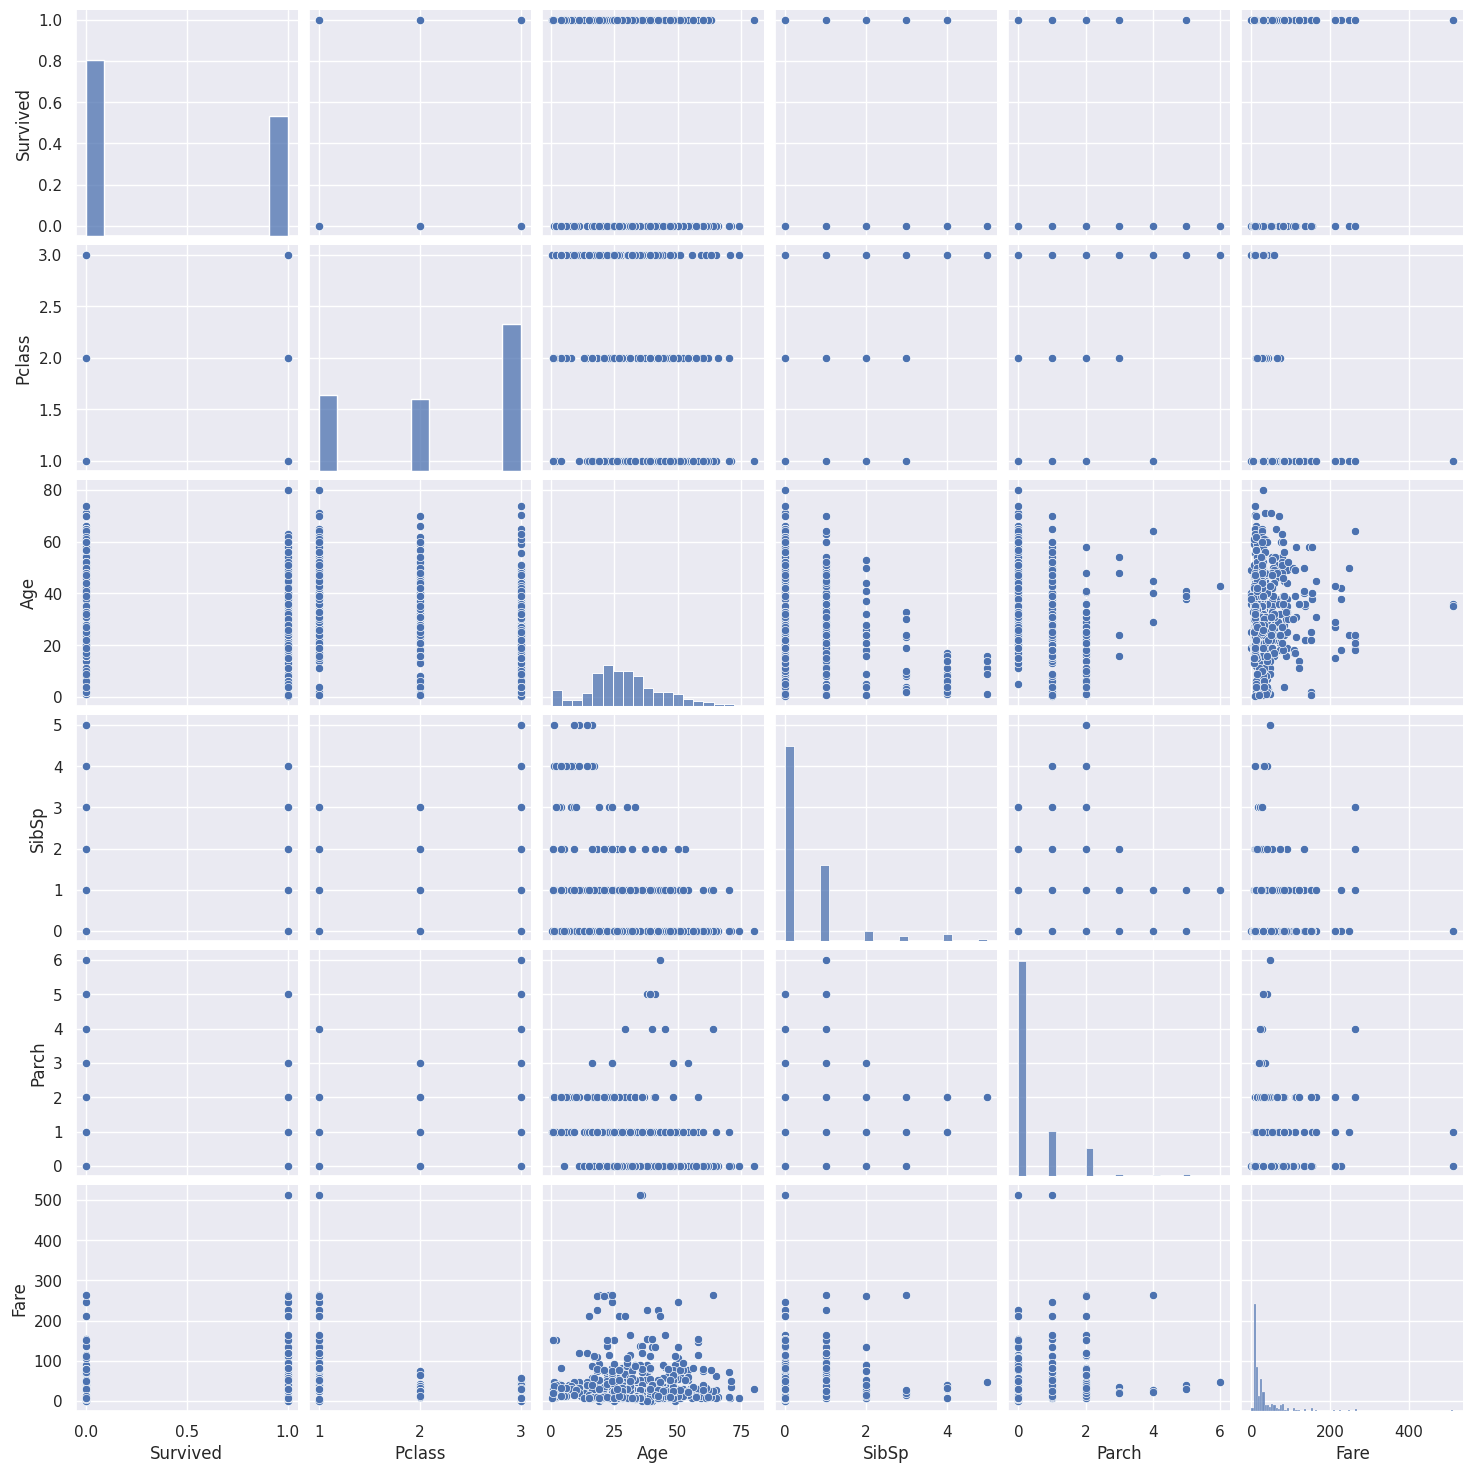

In [7]:
sns.pairplot(df)

**2. How does ticket price (Fare) depend on Pclass? Build a boxplot.**

<Axes: xlabel='Pclass', ylabel='Fare'>

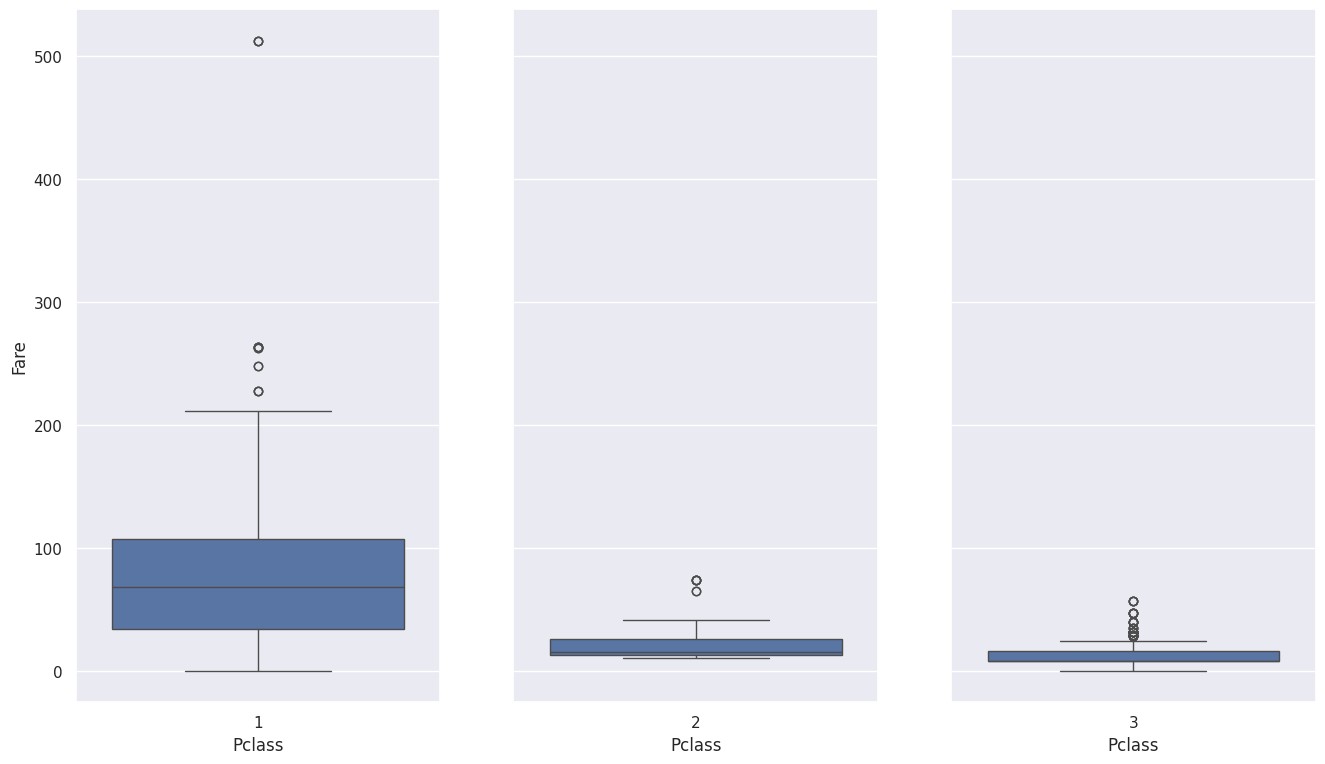

In [8]:
_, fare_figs = plt.subplots(1, 3, sharey=True, figsize=(16, 9))
# plt.yscale('log', base=np.e)
sns.boxplot(x='Pclass', y='Fare', data=df[df['Pclass'] == 1], ax=fare_figs[0])
sns.boxplot(x='Pclass', y='Fare', data=df[df['Pclass'] == 2], ax=fare_figs[1])
sns.boxplot(x='Pclass', y='Fare', data=df[df['Pclass'] == 3], ax=fare_figs[2])

<Axes: xlabel='Pclass', ylabel='Fare'>

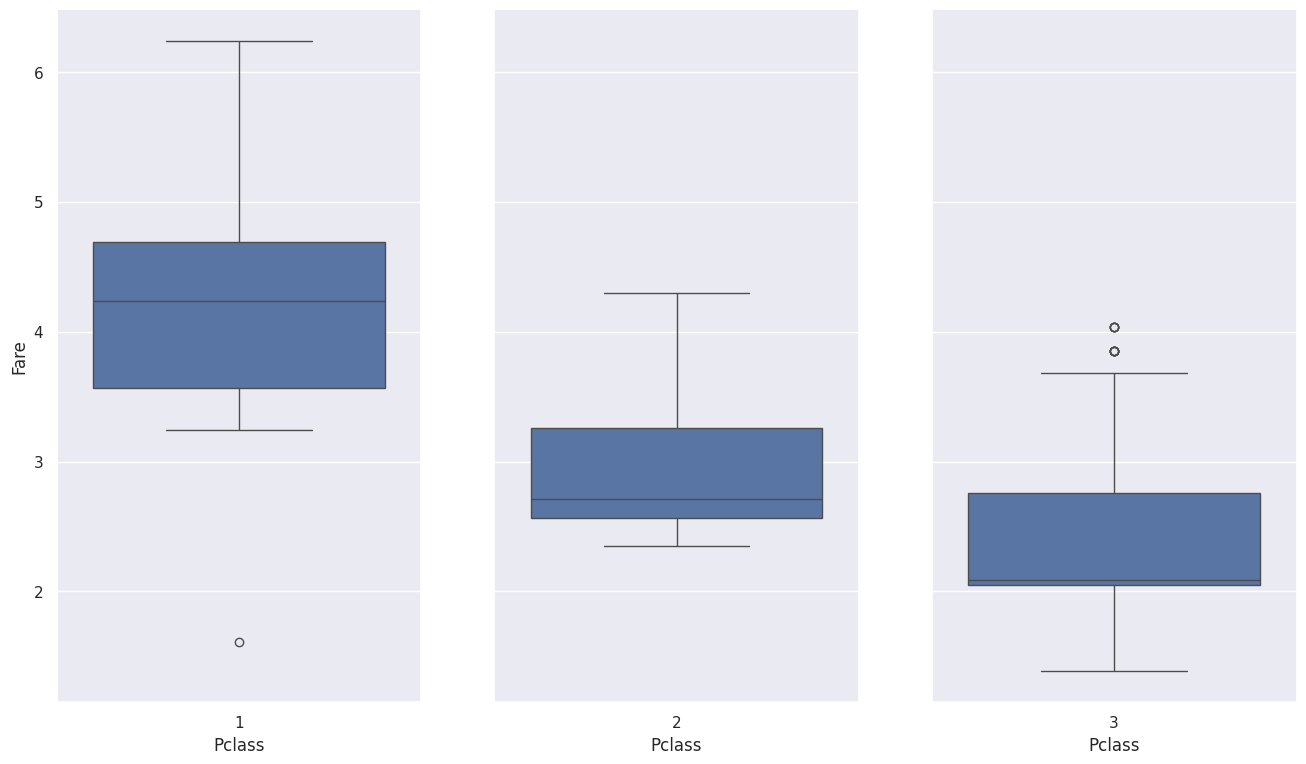

In [9]:
df_log = df[df['Fare'] > 0].copy()
df_log['Fare'] = np.log(df_log['Fare'])
_, fare_figs = plt.subplots(1, 3, sharey=True, figsize=(16, 9))
sns.boxplot(x='Pclass', y='Fare', data=df_log[df_log['Pclass'] == 1], ax=fare_figs[0])
sns.boxplot(x='Pclass', y='Fare', data=df_log[df_log['Pclass'] == 2], ax=fare_figs[1])
sns.boxplot(x='Pclass', y='Fare', data=df_log[df_log['Pclass'] == 3], ax=fare_figs[2])

In [10]:
df_log.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,181.0,4.212527,0.730914,1.609438,3.569533,4.238445,4.690430,6.238967
2,173.0,2.930631,0.494244,2.351375,2.564949,2.711099,3.258097,4.297285
3,351.0,2.412943,0.545125,1.389414,2.050913,2.085672,2.759741,4.034166


**3. Let's build the same plot but restricting values of Fare to be less than 95% quantile of the initial vector (to drop outliers that make the plot less clear).**

<Axes: xlabel='Pclass', ylabel='Fare'>

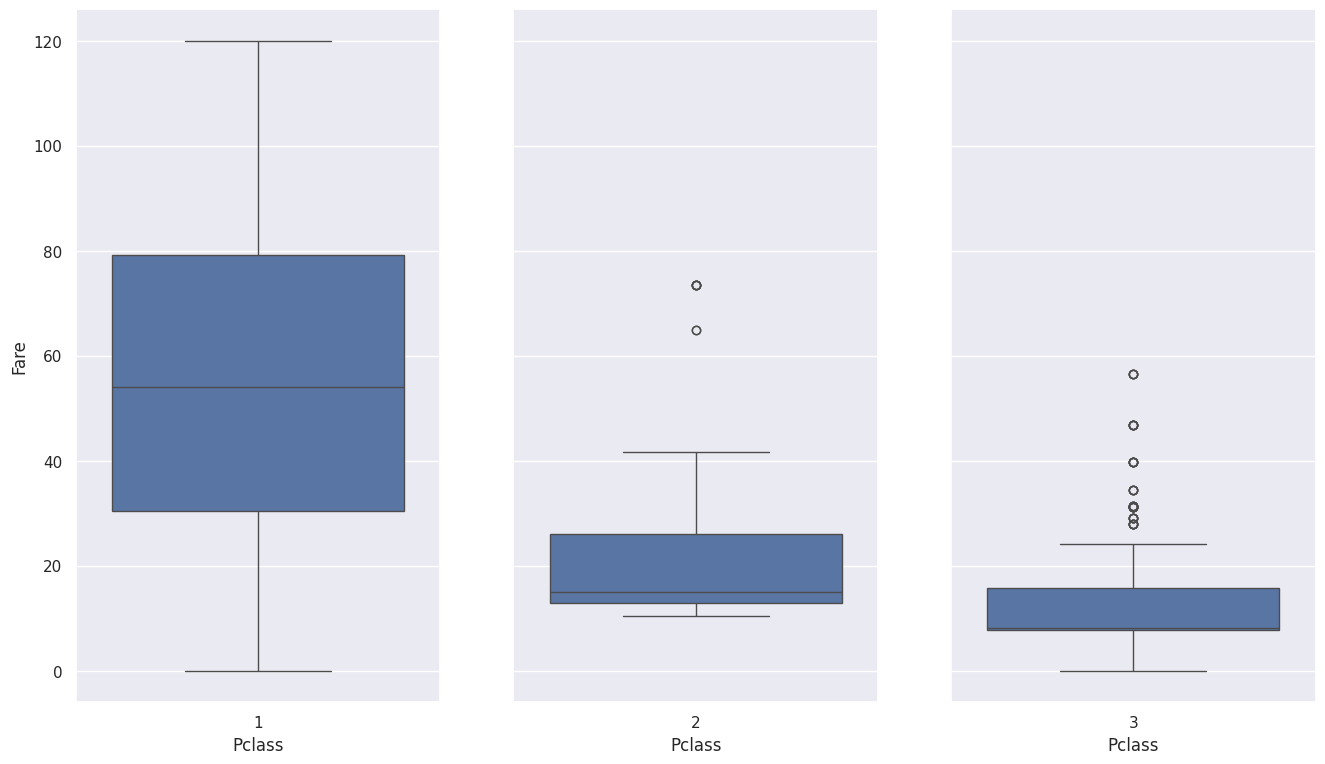

In [11]:
_, fare_figs_q95 = plt.subplots(1, 3, sharey=True, figsize=(16, 9))
# plt.yscale('log', base=np.e)
sns.boxplot(x='Pclass', y='Fare', data=df[(df['Pclass'] == 1) & (df['Fare'] <= df.Fare.quantile(.95))], ax=fare_figs_q95[0])
sns.boxplot(x='Pclass', y='Fare', data=df[(df['Pclass'] == 2) & (df['Fare'] <= df.Fare.quantile(.95))], ax=fare_figs_q95[1])
sns.boxplot(x='Pclass', y='Fare', data=df[(df['Pclass'] == 3) & (df['Fare'] <= df.Fare.quantile(.95))], ax=fare_figs_q95[2])

**4. How is the percentage of surviving passengers dependent on passengers' gender? Depict it with Seaborn.countplot using the hue argument.**

<Axes: xlabel='Survived', ylabel='count'>

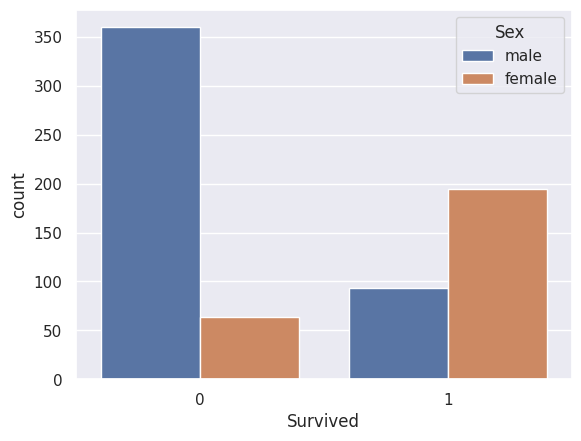

In [12]:
sns.countplot(data=df, x='Survived', hue='Sex')

**5. How does the distribution of ticket prices differ for those who survived and those who didn't. Depict it with ```Seaborn.boxplot```**


<Axes: xlabel='Survived', ylabel='Fare'>

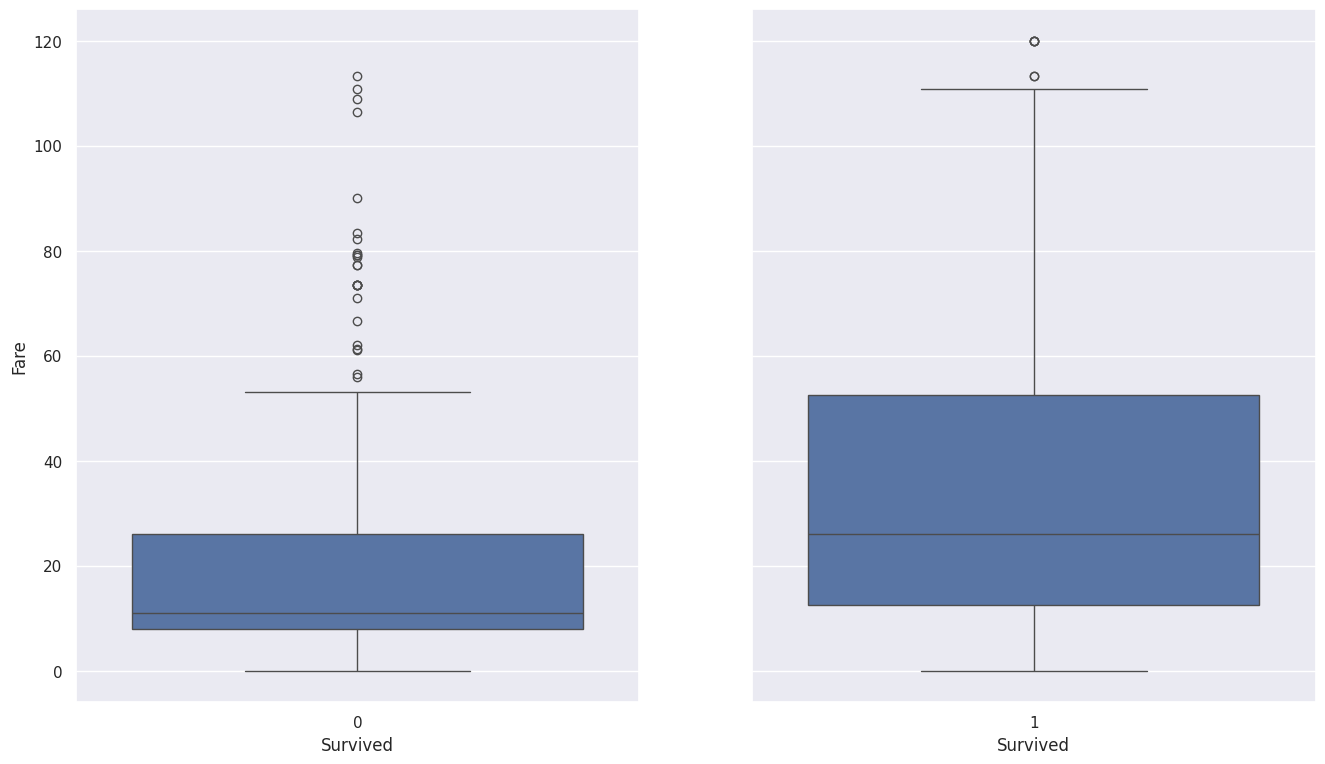

In [13]:
_, fig_price_vs_survived = plt.subplots(1, 2, sharey=True, figsize=(16, 9))
sns.boxplot(data=df[(df.Survived == 0) & (df.Fare <= df.Fare.quantile(.95))], x='Survived', y='Fare', ax=fig_price_vs_survived[0])
sns.boxplot(data=df[(df.Survived == 1) & (df.Fare <= df.Fare.quantile(.95))], x='Survived', y='Fare', ax=fig_price_vs_survived[1])

**6. How does survival depend on passengers' age? Verify (graphically) an assumption that youngsters (< 30 y.o.) survived more frequently than old people (> 55 y.o.).**

<Axes: xlabel='Survived', ylabel='count'>

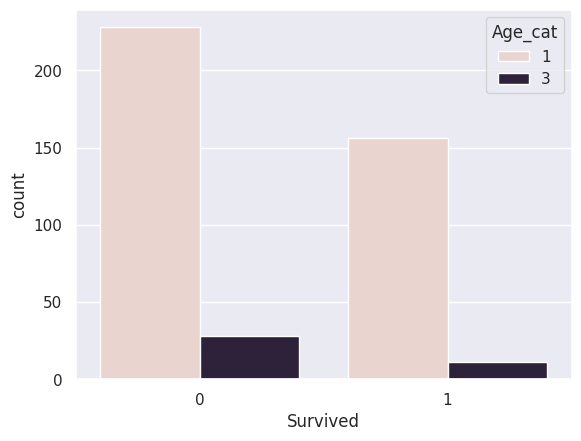

In [14]:
age_cats = [define_age_category(age) for age in df.Age]
df['Age_cat'] = age_cats

sns.countplot(data=df[(df.Age_cat == AgeCategory.YOUNG) | (df.Age_cat == AgeCategory.OLD)], x='Survived', hue='Age_cat')

In [15]:
# young_surived_percentage = len(df[(df.Age_cat == AgeCategory.YOUNG) & (df.Survived == 1)]) / len(df[df.Age_cat == AgeCategory.YOUNG])
# old_surived_percentage = len(df[(df.Age_cat == AgeCategory.OLD) & (df.Survived == 1)]) / len(df[df.Age_cat == AgeCategory.OLD])
young_surived_percentage = df[df.Age_cat == AgeCategory.YOUNG]['Survived'].mean()
old_surived_percentage = df[df.Age_cat == AgeCategory.OLD]['Survived'].mean()
round(young_surived_percentage, 2), round(old_surived_percentage, 2)

(0.41, 0.28)